In [9]:
import re
import sys
import math
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import matplotlib
import logging
import coloredlogs

sys.setrecursionlimit(50000)
logger = logging.getLogger(__name__)
coloredlogs.CHROOT_FILES = []
coloredlogs.install(level=logging.INFO, use_chroot=False)

2019-02-05 00:35:32 phx.local __main__[1136] INFO Computing for: 2051
2019-02-05 00:35:32 phx.local __main__[1136] INFO Depth: 10
2019-02-05 00:35:32 phx.local __main__[1136] INFO Depth: 9
2019-02-05 00:35:32 phx.local __main__[1136] INFO Depth: 8
2019-02-05 00:35:32 phx.local __main__[1136] INFO Depth: 7
2019-02-05 00:35:32 phx.local __main__[1136] INFO Depth: 6
2019-02-05 00:35:32 phx.local __main__[1136] INFO Depth: 5
2019-02-05 00:35:32 phx.local __main__[1136] INFO Depth: 4
2019-02-05 00:35:32 phx.local __main__[1136] INFO Depth: 3
2019-02-05 00:35:32 phx.local __main__[1136] INFO Depth: 2
2019-02-05 00:35:32 phx.local __main__[1136] INFO Depth: 1
2019-02-05 00:35:32 phx.local __main__[1136] INFO Depth: 0
2019-02-05 00:35:32 phx.local __main__[1136] INFO ALL done


0
[-2, -1, 0, 1, 2, 3, 4, 1027, 1025, 1024, 1026, 2051, 515, 513, 512, 514, 259, 257, 256, 258, 131, 129, 128, 130, 67, 65, 64, 66, 35, 33, 32, 34, 19, 17, 16, 18, 11, 9, 8, 10, 7, 5, 6, 15, 14, 31, 30, 13, 63, 62, 29, 127, 126, 61, 255, 254, 125, 511, 510, 253]
[-2, -1, 0, 1, 2, 3, 4, 5, 7, 6, 11, 9, 8, 10, 19, 17, 16, 18, 35, 15, 33, 14, 32, 34, 67, 31, 65, 13, 30, 64, 66, 131, 63, 129, 29, 62, 128, 130, 259, 127, 257, 61, 126, 256, 258, 515, 255, 513, 125, 254, 512, 514, 1027, 511, 1025, 253, 510, 1024, 1026, 2051]
[[2051], [1027, 1025, 1024, 1026], [515, 513, 512, 514, 511, 510], [259, 257, 256, 258, 255, 254, 253], [131, 129, 128, 130, 127, 126, 125], [67, 65, 64, 66, 63, 62, 61], [35, 33, 32, 34, 31, 30, 29], [19, 17, 16, 18, 15, 14, 13], [11, 9, 8, 10], [7, 6], [5, -2, -1, 0, 1, 2, 3, 4]]
[{1024, 1025, 1026, 131, 259, 515, 1027, 2051, 8, 514, 256, 130, 129, 128, 257, 15, 255, 512, 17, 19, 258, 16, 513, 18, 29, 30, 31, 32, 33, 34, 35, 61, 62, 63, 64, 65, 66, 67, 13, 14, 125, 254,

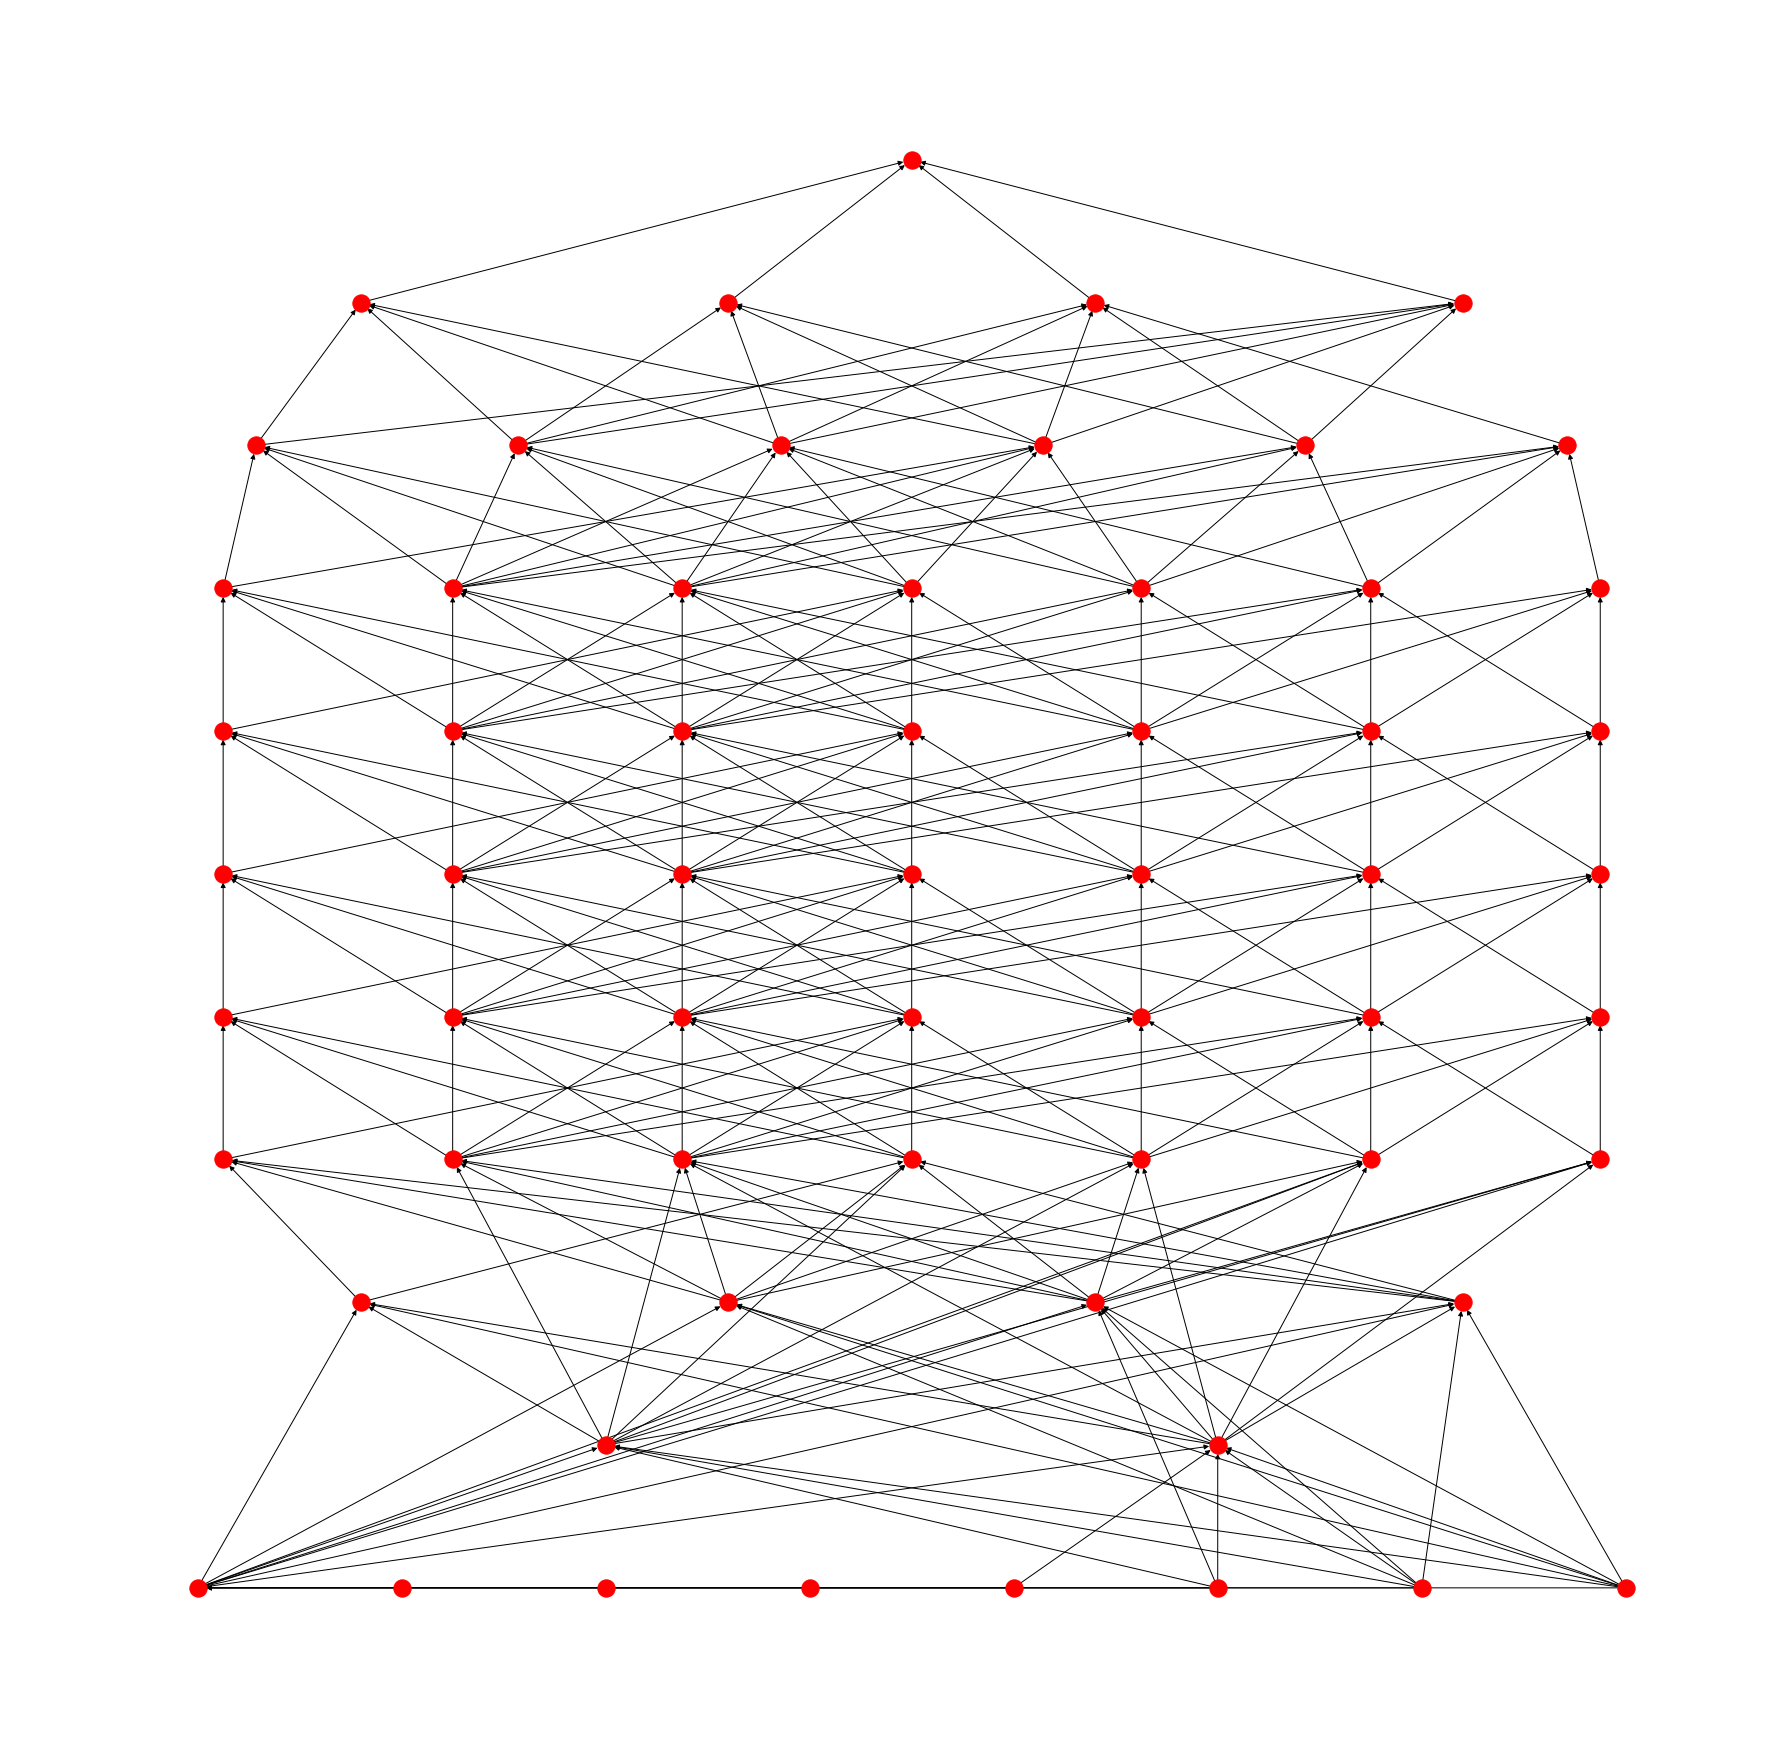

In [12]:
# https://networkx.github.io/documentation/stable/_downloads/networkx_reference.pdf
# https://www.analyticsvidhya.com/blog/2018/09/introduction-graph-theory-applications-python/
# https://www.python-course.eu/networkx.php

import itertools
import functools
import networkx as nx
import matplotlib.pyplot as plt

N=2**11+3
G=nx.DiGraph()
base_nodes = [-2,-1,0,1,2,3,4]
GRP_N = set()
GRP_E = set()
ALLN = [] + base_nodes
ALLNS = set(ALLN)
G.add_nodes_from(ALLN)
#G.add_edges_from([(4,-2), (4, 0), (4, 3)])
VDP = []
DPTH = set()
logger.info('Computing for: %s' % N)

def add_g(nodes):
    global G, GRP_N
    G.add_nodes_from(nodes)
#     for x in nodes:
#         if x not in GRP_N:
#             G.add_node(x)
#             GRP_N.add(x)
            
            
def add_e(edges):
    global G, GRP_E
    #G.add_edges_from(edges)
    G.add_edges_from([(b,a) for a,b in edges])
#     for e in edges:
#         if e not in GRP_E:
#             GRP_E.add(e)
            

def add_nodes(nodes,d=0):
    global ALLN, ALLNS,VDP,DPTH
    for x in nodes:
        if x not in ALLNS:
            ALLN.append(x)
            ALLNS.add(x)
            VDP.append((x,d))
    if d not in DPTH:
        logger.info('Depth: %s' % d)
        DPTH.add(d)


@functools.lru_cache(maxsize=4096)  # essential for computational speed
def poly(n, d=0):
    global G
    if n <= 0:
        return 0#[-n]
    if n == 1 or n == 2:
        return 0#[1]  # x.parent().one()
    elif n == 3:
        return 0#[3]  # 3*x**4 + b2*x**3 + 3*b4*x**2 + 3*b6*x + b8
    elif n == 4:
        return 0
        #return [-2, 0, 3] #-poly(-2) + (6*x**2 + b2*x + b4) * poly(3)
    elif n % 2 == 0:
        m = (n-2) // 2
        nodes = [m+1, m+3, m, m-1, m+2]
        edges = [(n,x) for x in nodes]
        add_g(nodes)
        add_e(edges)
        #G.add_edges_from(edges)
        del nodes, edges
        poly(m+1,d+1) + poly(m+3,d+1) + poly(m,d+1) + poly(m-1,d+1) + poly(m+2,d+1)
        add_nodes([n],d)
        return 0
        #return poly(m+1,d+1) + poly(m+3,d+1) + poly(m,d+1) + poly(m-1,d+1) + poly(m+2,d+1)
        #return poly(m+1) * (poly(m+3) * poly(m)**2 - poly(m-1) * poly(m+2)**2)
    else:
        m = (n-1) // 2
        nodes = [m+2, m, m-1, m+1]  # -2 removed for nicer structure
        edges = [(n,x) for x in nodes]
        add_g(nodes)
        add_e(edges)
        #G.add_edges_from(edges)
        del nodes, edges
        poly(-2,d+1) + poly(m+2,d+1) + poly(m,d+1) + poly(m-1,d+1) + poly(m+1,d+1)
        add_nodes([n],d)
        return 0
#         if m % 2 == 0:  
#             return poly(-2,d+1) + poly(m+2,d+1) + poly(m,d+1) +                poly(m-1,d+1) + poly(m+1,d+1)
#             #return poly(-2) * poly(m+2) * poly(m)**3 -            poly(m-1) * poly(m+1)**3
#         else:
#             return            poly(m+2,d+1) + poly(m,d+1)     + poly(-2,d+1) + poly(m-1,d+1) + poly(m+1,d+1)
#             #return            poly(m+2) * poly(m)**3 - poly(-2) * poly(m-1) * poly(m+1)**3

           
print(poly(N))
print(G.nodes())  #print(G.edges())
print(ALLN)
logger.info('ALL done')

VDP.sort(key=lambda x: x[1])
VDP += [(x, VDP[-1][1]) for x in base_nodes]

shells = []
for k,g in itertools.groupby(VDP, lambda x: x[1]):
    shells.append([x[0] for x in g])
print(shells)

# Connected components from one sub
print(list(nx.kosaraju_strongly_connected_components(G, 8)))  #N//2

def mylay(shells):
    res = {}
    for lvl, sh in enumerate(shells):
        ch = 1000 / (len(sh)+1)
        for i, p in enumerate(sh):
            res[p] = ch+i*ch, -100*lvl
    return res

plt.figure(figsize=(24,24))
#nx.draw_networkx(G, with_labels=True)
#nx.draw(G, with_labels=True)
#nx.draw(G, with_labels=True, pos=nx.circular_layout(G))
#nx.draw(G, with_labels=True, pos=nx.kamada_kawai_layout(G))
#nx.draw(G, with_labels=True, pos=nx.shell_layout(G, shells))
nx.draw(G, with_labels=False, pos=mylay(shells))